<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**


---

# Fetal Health prediction

Maternity is an important part of life, especially in humans (and mammals in general) where newborns require a higher degree of parental care. Thus, assessing Fetal Health must be an important part of any healthcare program.

<p align=center>
<img src="img/fetal_health.jpg" width="40%"><br>
<i><sup>Image credits: freepik (<a href="https://br.freepik.com/vetores-gratis/gravidez-e-cenas-de-maternidade_9882829.htm">www.freepik.com</a>)</sup></i>
</p>

Usually, a regular pregnancy lasts around 37 to 42 weeks<sup>1</sup>. This period is usually divided into three months periods (trimesters), and the fetus grows and develops in each and every phase. Asssesing the fetus' health during these periods are very important and can help keep the parent and the baby healthy, spot issues if there are any and prevent problems during delivery, among other benefits<sup>2</sup>. Thus, being able to predict if a baby is healthy or not while still in the womb becomes an important issue that can be addressed by machine learning.

In this notebook we will be looking at a Fetal Health dataset, using classification machine learning models in [PyCaret](https://pycaret.org/). PyCaret is a popular, low-code library, that provides an automated way to create data analysis workflows using Machine Learning. It aims to reduce time used for coding the models, while leaving more time for the analyses themselves.

## The Data

The data for this project was obtained on [Kaggle](https://www.kaggle.com/annetxu/health-insurance-cost-prediction). According to the dataset's page, the data comprises 2126 observations over 21 features. These features come from Cardiotocogram exames. Cardiotography, usually called CTG, is a method to continuously monitor fetal heart rates, as well as womb contractions, using ultrasound and is a widely used method to assess fetal wellbeing<sup>3</sup>.

According to the dataset page, the patients were classified by three expert obstetritians into one of three classes: normal, suspect or pathological; indicating the current health scenario.

For ease of access I have downloaded the dataset and included it in the `data` folder for this project. Now let us begin.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv
import tools
from pywaffle import Waffle

# Importing pycaret tools
from pycaret.classification import setup, compare_models, create_model, predict_model
from pycaret.classification import tune_model, plot_model, interpret_model, finalize_model


# Getting the data
df = pd.read_csv("data/fetal_health.csv")

# Life, the Universe, and Everything
np.random.seed(42)

# Defining plot parameters
# plt.style.use('dark_background')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.stretch'] = 'normal'
plt.rcParams['font.style'] = 'normal'
plt.rcParams['font.variant'] = 'normal'

# Checking first entries of the dataset
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [2]:
df.shape

(2126, 22)

### Our variables

According to the dataset webpage on Kaggle, our variables represent the following:

* `baseline value` = Baseline Fetal Heart Rate (FHR).
* `accelerations` = Number of accelerations per second.
* `fetal_movement` = Number of fetal movements per second.
* `uterine_contractions` = Number of uterine contractions per second.
* `light_decelerations` = Number of LDs per second.
* `severe_decelerations` = Number of SDs per second.
* `prolongued_decelerations` = Number of PDs per second.
* `abnormal_short_term_variability` = Percentage of time with abnormal short term variability.
* `mean_value_of_short_term_variability` = Mean value of short term variability.
* `percentage_of_time_with_abnormal_long_term_variability` = Percentage of time with abnormal long term variability.
* `mean_value_of_long_term_variability` = Mean value of long term variability.
* `histogram_width` = Width of the histogram made using all values from a record.
* `histogram_min` = Histogram minimum value.
* `histogram_max` = Histogram maximum value.
* `histogram_number_of_peaks` = Number of peaks in the exam histogram.
* `histogram_number_of_zeroes` = Number of zeroes in the exam histogram.
* `histogram_mode` = Mode of the exam histogram.
* `histogram_mean` = Mean of the exam histogram.
* `histogram_median` = Median of the exam histogram.
* `histogram_variance` = Variance of the exam histogram.
* `histogram_tendency` = Trend of the exam histogram.
* `fetal_health` = Our actual variable of interest, corresponding: 1 - Normal 2 - Suspect 3 - Pathological.

Now let's check how our variables are encoded:

In [3]:
# Checking our variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [4]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,8.187629,70.445908,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,5.628247,38.955693,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,0.000000,3.000000,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,4.600000,37.000000,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,7.400000,67.500000,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,10.800000,100.000000,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,50.700000,180.000000,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


Okay, Houston, we've had a problem here! Our target variable is `fetal_health`, but that variable type is `float64` and our minimum value is `1`. Let us see what is going on here:

In [5]:
# Checking target variable
print(df.fetal_health.unique())

[2. 1. 3.]


In [6]:
# Check first values
df.fetal_health.head()

0    2.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: fetal_health, dtype: float64

The variable is coded starting in `1`. However, since Python indexes start at zero, this might lead to problems further down the line so let us fix that.

In [7]:
# Fixing target variable
df['fetal_health'] = np.select([(df['fetal_health'] == 1),
                                (df['fetal_health'] == 2),
                                (df['fetal_health'] == 3)], 
                                [0,1,2])

# Checking again
df.fetal_health.head()

0    1
1    0
2    0
3    0
4    0
Name: fetal_health, dtype: int32

As we saw above, none of our features have any missing values. Since they are all `float64`, we can be sure that there are no empty strings counting as non-empty values. However, there could be a case of a variable that can't be zero. The fetal baseline heart rate, for example, can't be zero for obvious reasons. We also saw from our descriptive statistics above that there are no zero values in this column of our dataset, which is good. Let's generate a report with SweetViz so we can have a better view of our dataset:

In [8]:
# Making sweetviz report
sweetviz = sv.analyze(df)
sweetviz.show_html('class.html')

                                             |          | [  0%]   00:00 -> (? left)

Report class.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


(Click [here](https://htmlpreview.github.io/?https://github.com/cfantecelle/data_science_portfolio/blob/63680c0f93d8a1fadaca7be2c21e7b8b283ee368/project_automl/class.html) to see the HTML report from GitHub.)

From this report we can see that our features have different distributions, and most of them are skewed. In addition, when evaluating the correlations between the features we can see that some of them are inversely correlated to one another and some of them are not correlated to our target variable at all. Thus, in this project we will use *Feature Selection* to verify if we can improve the classification of our dataset.

*Feature Selection*, or variable/attribute selection, in machine learning and statistics is an approach that takes advantage of selecting a subset of relevant features (variables or predictors) to use for construction of models<sup><a href="https://en.wikipedia.org/wiki/Feature_selection">4</a></sup>. Working with this subset of features brings advantages to our models by reducing its size (and, consequently, training times), reduzing the risk of over-fitting, improving accuracy of the model<sup><a href="https://pycaret.gitbook.io/docs/get-started/preprocessing/feature-selection">5</a></sup>. PyCaret has a parameter for model construction called `feature_selection` which, when set to `True`, will employ several supervised techniques for feature selection in the model using a threshold<sup><a href="https://pycaret.gitbook.io/docs/get-started/preprocessing/feature-selection">5</a></sup>.

Let's check our target variable:

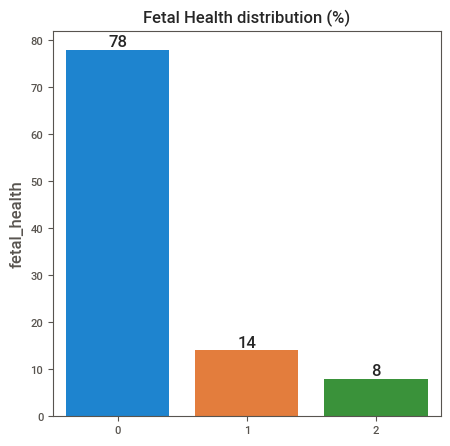

In [9]:
# Plotting barplot
fig, ax = plt.subplots(figsize=(5,5))
sns.barplot(x=sorted(df.fetal_health.unique()), y=round(df.fetal_health.value_counts()/df.shape[0]*100), data=df, ax=ax)
ax.set_title('Fetal Health distribution (%)', fontsize=12, weight='bold')
ax.bar_label(ax.containers[0]);

Our target variable, `fetal_health`, is very unbalanced towards the healthy status. And here our goal is to try and predict when the fetus might not be healthy. Thus, when building our models we will deal with that as well. Now we can split our data into train and test datasets before proceeding with PyCaret.

In [10]:
# Creating test dataset
test = df.sample(frac=0.25, random_state=42)

# Creating train data by dropping test data
train = df.drop(test.index)

# Resetting indexes
train.reset_index(inplace=True, drop=True)
test.reset_index(inplace=True, drop=True)

Let's check if our proportions match the original dataset:

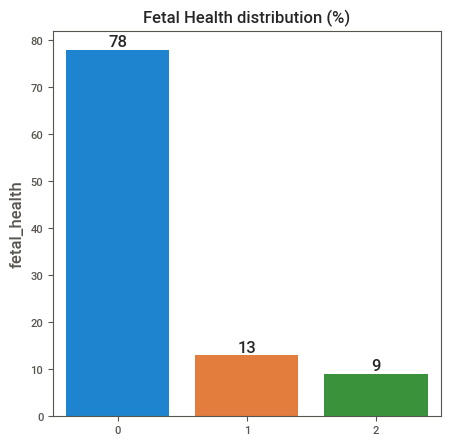

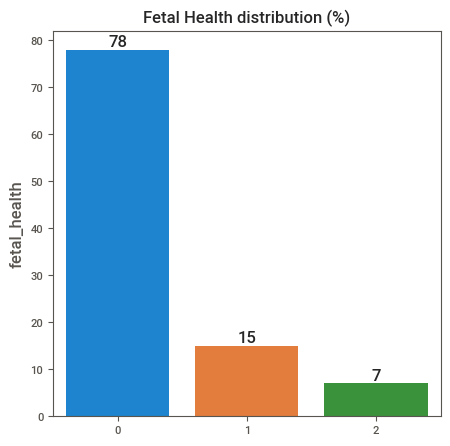

In [11]:
# Plotting barplot
fig, ax = plt.subplots(figsize=(5,5))
sns.barplot(x=sorted(train.fetal_health.unique()), y=round(train.fetal_health.value_counts()/train.shape[0]*100), data=train, ax=ax)
ax.set_title('Fetal Health distribution (%)', fontsize=12, weight='bold')
ax.bar_label(ax.containers[0]);

# Plotting barplot
fig, ax = plt.subplots(figsize=(5,5))
sns.barplot(x=sorted(test.fetal_health.unique()), y=round(test.fetal_health.value_counts()/test.shape[0]*100), data=test, ax=ax)
ax.set_title('Fetal Health distribution (%)', fontsize=12, weight='bold')
ax.bar_label(ax.containers[0]);

They have roughly the same percentages, so we will proceed with the analysis.

## Classification with PyCaret

To begin our classification analysis with PyCaret, we first instantiate the setup with our parameters. Here, we will make two classification setups: one where we will use the `feature_selection` option from the PyCaret pipeline and one where we will not. Thus, we will be able to see how this approach can improve our models.

### Setting up models

#### Without Feature Selection

In [12]:
# Setting up classification models without feature selection
class_nofeat = setup(data=train,
                    target='fetal_health',
                    normalize=True,
                    normalize_method='zscore',
                    experiment_name='FetalHealthClass',
                    session_id=42,
                    feature_selection=False,
                    fix_imbalance=True
                    )


,Description,Value
0,session_id,42
1,Target,fetal_health
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(1594, 22)"
5,Missing Values,False
6,Numeric Features,20
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


So, now that we've setup our analysis, let's see how the models perform in these settings:

In [13]:
best_nofeat = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9417,0.9855,0.8930,0.9438,0.9416,0.8372,0.8389,0.1380
lightgbm,Light Gradient Boosting Machine,0.9417,0.9851,0.8867,0.9448,0.9416,0.8373,0.8399,0.0930
catboost,CatBoost Classifier,0.9381,0.9831,0.8896,0.9406,0.9380,0.8286,0.8305,3.9700
rf,Random Forest Classifier,0.9345,0.9828,0.8851,0.9375,0.9346,0.8195,0.8217,0.0590
et,Extra Trees Classifier,0.9319,0.9834,0.8611,0.9333,0.9306,0.8059,0.8090,0.0400
gbc,Gradient Boosting Classifier,0.9309,0.9757,0.8879,0.9350,0.9317,0.8104,0.8124,0.2540
dt,Decision Tree Classifier,0.8987,0.8760,0.8369,0.9073,0.9009,0.7257,0.7288,0.0060
ada,Ada Boost Classifier,0.8888,0.8960,0.8083,0.8971,0.8906,0.6958,0.7003,0.0300
lr,Logistic Regression,0.8718,0.9662,0.8356,0.9026,0.8814,0.6862,0.6988,0.5150
knn,K Neighbors Classifier,0.8655,0.9445,0.8425,0.8986,0.8759,0.6719,0.6853,0.1920


In these settings, we have already achieved excellent values in our metrics, especially AUC and Recall, and XGBoost was our best model. Because of the [*Accuracy Paradox*](https://en.wikipedia.org/wiki/Accuracy_paradox), measuring the accuracy of the model alone is not a good metric to evaluate our model. In these cases, better metrics to look at are the **precision**, the **recall**, and the **AUC ROC** metric.

To be more specific, the **precision** of our model measures our model's ability to avoid classifying a healthy fetus as suspected or pathological case.

The **recall**, or sensitivity, is the ability of our model to correctly identify all positive cases, i.e., correctly assigning the suspected and pathological cases.

It is easy to perceive which of these cases is more important here. Predicting true positive cases is essential to identify and allow the management of unhealthy unborn children. Whereas, if a normal case is assigned as a suspected or pathological case, they can be further investigated to rule out any possible issues.

The **AUC** represents the area under a ROC curve. A ROC curve plots the *sensitivity* (true positives rate) against *1 - Specificity* (false positives rate). The higher the area under the curve (i.e. the closer to 1 the value is), the closer is the probability that we are assigning our classes correctly.

With these metrics in mind, we can see that we have already achieved great values for predicting the fetus' health, with the top three recall rates between 0.88 and 0.89, and AUC over 0.98 in all three cases. Can we improve on that, using Feature Selection?

#### With Feature Selection

In [14]:
# Setting up classification models with feature selection
class_feat = setup(data=train,
                   target='fetal_health',
                   normalize=True,
                   normalize_method='zscore',
                   experiment_name='FetalHealthClass',
                   session_id=42,
                   feature_selection=True,
                   fix_imbalance=True
                  )

,Description,Value
0,session_id,42
1,Target,fetal_health
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(1594, 22)"
5,Missing Values,False
6,Numeric Features,20
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


And comparing our models now, we have:

In [15]:
best_feat = compare_models(sort='Recall')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9354,0.9782,0.8973,0.9399,0.9364,0.8242,0.8263,0.2500
lightgbm,Light Gradient Boosting Machine,0.9444,0.9840,0.8966,0.9469,0.9444,0.8455,0.8474,0.0770
xgboost,Extreme Gradient Boosting,0.9381,0.9854,0.8902,0.9406,0.9378,0.8283,0.8302,0.1200
rf,Random Forest Classifier,0.9364,0.9846,0.8884,0.9402,0.9370,0.8262,0.8282,0.0680
et,Extra Trees Classifier,0.9345,0.9843,0.8803,0.9374,0.9348,0.8190,0.8203,0.0420
catboost,CatBoost Classifier,0.9309,0.9829,0.8790,0.9347,0.9317,0.8106,0.8125,3.3470
knn,K Neighbors Classifier,0.8735,0.9575,0.8562,0.9082,0.8840,0.6933,0.7082,0.0100
lr,Logistic Regression,0.8745,0.9678,0.8514,0.9069,0.8842,0.6955,0.7096,0.0150
svm,SVM - Linear Kernel,0.8781,0.0000,0.8502,0.9076,0.8862,0.7009,0.7137,0.0080
dt,Decision Tree Classifier,0.9077,0.8892,0.8421,0.9111,0.9081,0.7488,0.7509,0.0060


With feature selection, we can see that the metrics for the XGBoost classifier actually got worse, while still close to what was achieved before. The LightGBM presented the best metrics overall, however this algorithm does not perform well in small datasets (<10000 rows), and overfits the data. 

XGBoost achieved overall better results than GBC, except for Recall by a very low margin, and with a faster time (~half) while also achieving the best AUC metric. Thus, we will proceed using XGBoost and see how tunning the model affects both models, with feature selection or not.

### Tunning XGBoost

Since the Recall metric is the most important overall (i.e., correctly predicting cases other than the reference), we will optmize our models to maximize the Recall.

#### Without Feature Selection

In [16]:
# Setting up classification models without feature selection
class_nofeat = setup(data=train,
                    target='fetal_health',
                    normalize=True,
                    normalize_method='zscore',
                    experiment_name='FetalHealthClass',
                    session_id=42,
                    feature_selection=False,
                    fix_imbalance=True
                    )

# Creating XGBoost model with no feature selection
xgb_nofeat = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9375,0.9852,0.8839,0.9389,0.9380,0.8289,0.8292
1,0.9196,0.9782,0.8858,0.9222,0.9208,0.7798,0.7801
2,0.9554,0.9834,0.9109,0.9550,0.9550,0.8733,0.8737
3,0.9554,0.9819,0.9146,0.9665,0.9572,0.8809,0.8852
4,0.9196,0.9907,0.8774,0.9261,0.9220,0.7864,0.7884
5,0.9099,0.9765,0.8420,0.9046,0.9058,0.7330,0.7347
6,0.9550,0.9897,0.8914,0.9572,0.9542,0.8713,0.8733
7,0.9550,0.9913,0.9409,0.9577,0.9556,0.8796,0.8808
8,0.9640,0.9903,0.9247,0.9635,0.9629,0.8988,0.8995


In [17]:
# Tunning model
tuned_xgb_nofeat = tune_model(xgb_nofeat, optimize='Recall', choose_better=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9286,0.9864,0.9096,0.9341,0.9298,0.8109,0.8134
1,0.9196,0.9785,0.9259,0.9339,0.9237,0.7966,0.8041
2,0.9375,0.9706,0.8997,0.9360,0.9366,0.8227,0.8230
3,0.9554,0.9830,0.9146,0.9665,0.9572,0.8809,0.8852
4,0.9286,0.9885,0.9328,0.9387,0.9314,0.8161,0.8215
5,0.9099,0.9593,0.8620,0.9080,0.9086,0.7422,0.7423
6,0.9279,0.9830,0.8799,0.9279,0.9279,0.8007,0.8007
7,0.9279,0.9889,0.9294,0.9383,0.9309,0.8161,0.8216
8,0.9369,0.9758,0.9132,0.9397,0.9379,0.8313,0.8323


Without feature selection, we were able to improve our Recall, while loosing some Accuracy, Precision and AUC. The tradeoff here was overall balanced (losing ~1% of the other metrics with ~1% increase in Recall). Let's see if our data with feature selection behaves differently.

#### With Feature Selection

In [18]:
# Setting up classification models with feature selection
class_feat = setup(data=train,
                  target='fetal_health',
                  normalize=True,
                  normalize_method='zscore',
                  experiment_name='FetalHealthClass',
                  session_id=42,
                  feature_selection=True,
                  fix_imbalance=True
                  )

# Creating XGBoost model with no feature selection
xgb_feat = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9196,0.9866,0.8763,0.9259,0.9218,0.7871,0.7891
1,0.9196,0.9809,0.8858,0.9228,0.9208,0.7835,0.7844
2,0.9554,0.9812,0.9258,0.9544,0.9547,0.8733,0.8737
3,0.9464,0.9823,0.8775,0.9574,0.9467,0.8546,0.8584
4,0.9464,0.9906,0.9256,0.9542,0.9487,0.8598,0.8636
5,0.9009,0.9740,0.8382,0.8964,0.8980,0.7114,0.7120
6,0.9550,0.9918,0.9009,0.9586,0.9530,0.8715,0.8744
7,0.9459,0.9909,0.9171,0.9474,0.9458,0.8532,0.8539
8,0.9640,0.9899,0.9247,0.9635,0.9629,0.8988,0.8995


In [19]:
# Tunning model
tuned_xgb_feat = tune_model(xgb_feat, optimize='Recall', choose_better=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9196,0.9858,0.9259,0.9339,0.9237,0.7966,0.8041
1,0.9375,0.9708,0.9535,0.9477,0.9401,0.8393,0.8451
2,0.9464,0.9707,0.9404,0.9502,0.9478,0.8552,0.8563
3,0.9554,0.9811,0.9146,0.9665,0.9572,0.8809,0.8852
4,0.9107,0.9808,0.8588,0.9200,0.9139,0.7663,0.7697
5,0.9189,0.9663,0.8858,0.9194,0.9189,0.7719,0.7722
6,0.9550,0.9915,0.9209,0.9565,0.9544,0.8757,0.8765
7,0.9279,0.9829,0.9294,0.9383,0.9309,0.8161,0.8216
8,0.9279,0.9747,0.8894,0.9284,0.9280,0.8041,0.8044


We can see that both of them achieved very similar results, with the model that employed feature selection within PyCaret's pipeline performed just marginally better. We will use this model further down the analysis, and will see how it performs.

### Evaluating our model

First, let's see our confusion matrix tu summarise our metris.

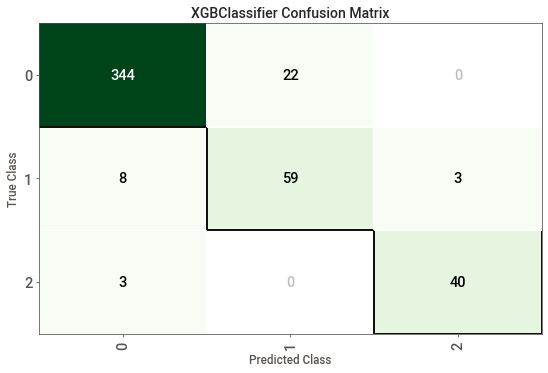

In [20]:
# Plotting confusion matrix
plot_model(tuned_xgb_feat, 'confusion_matrix', scale=0.7)

We can see from this that very few cases were labeled as normal (8 for suspected and 3 for the actual cases). This means that our model was very good at actually predicting the cases, even if sometimes it 'overestimated' our classification (normal labeled as suspected/pathological cases), as this can be fruther investigated to rule out any possible issues. Another good aspect of our model is that it almost always (~93%) correctly predicted our pathological cases, and even when it failed to do so it classified the samples as Suspected, which automatically warrants further investigation into the matter. The only downside of our model is that it failed to predict ~27% (n = 22) suspected cases and lebeled them as Normal. 

Let us see which of our variables were better at predicting our class.

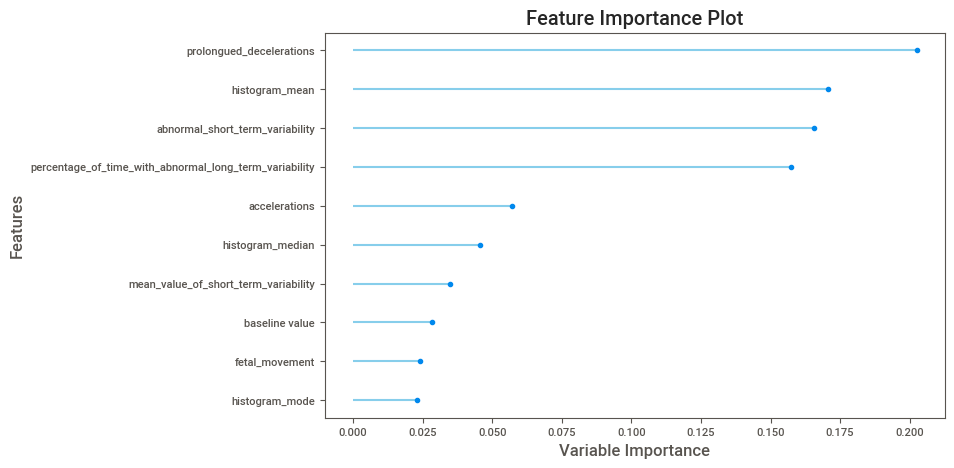

In [36]:
# Feature Importance plot
plot_model(tuned_xgb_feat, 'feature')

We can see that the number of prolonged decelerations, histogram mean and abnormal short/long term variability features were the most important in our predictions. Let's get an idea which variable was best for which class:

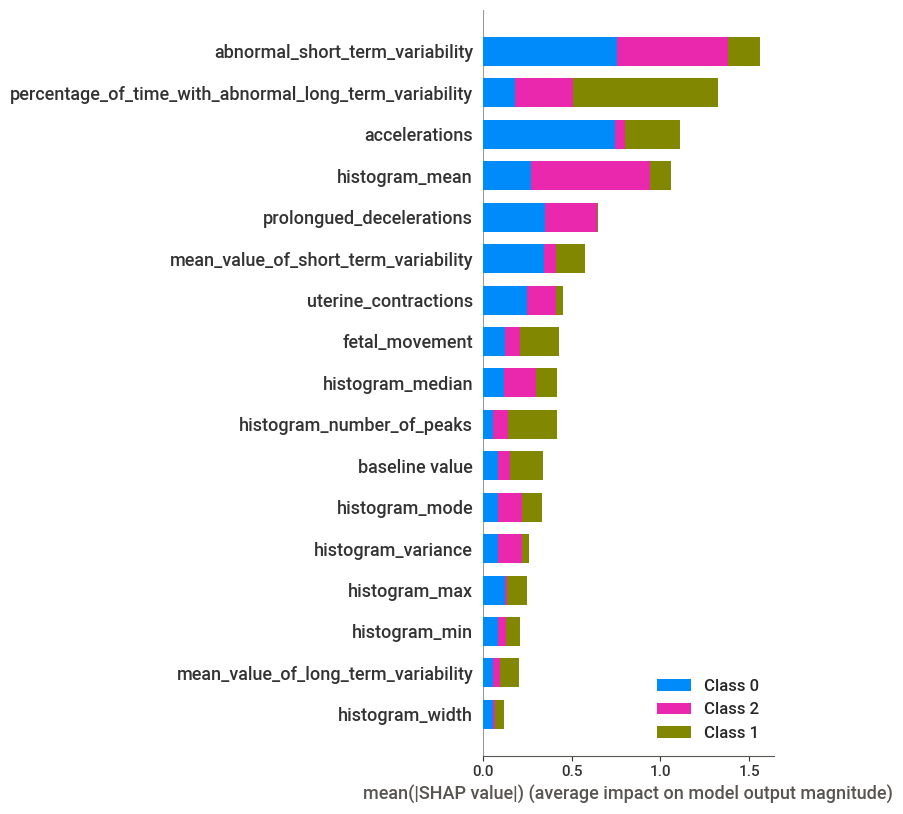

In [41]:
# Plotting SHAP means
interpret_model(tuned_xgb_feat)

'Abnormal Short Term Variabiliy' and 'Percentage of Time with Abnormal Long Term Variability', along with 'Accelerations' and 'Histogram Means' were the best at distinguishing our classes, followed by 'Prolongued Decelerations'. The same top 5 variables here appeared on the top 5 important features on the plot just before.

Let's examine the ROC Curves, i.e., our models ability to correctly predict our classes:

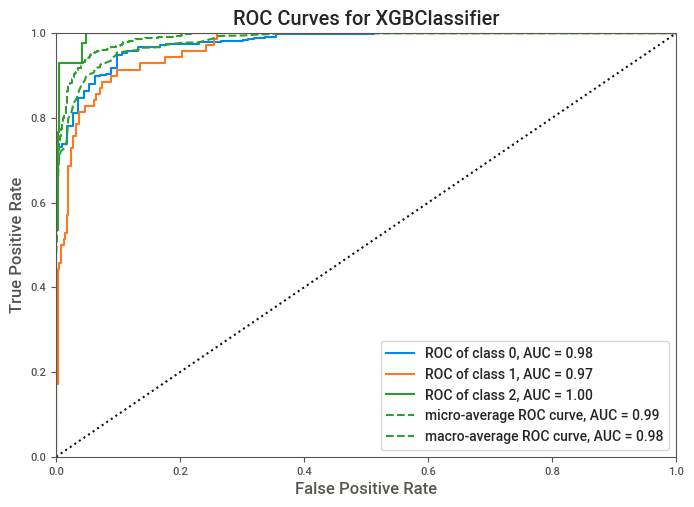

In [22]:
# Plotting AUC
plot_model(tuned_xgb_feat, 'auc')

We can see that the ROC curve for class 2 (pathological cases), was ***nearly*** perfect (even though it was rounded to 1 in the plot legends). This is extremely good, since this is the most important instance that we are trying to predict here. Let's see how good we can predict our data using the test data.

### Applying our model

First we will finalise and test our model.

In [23]:
# Finalising model
final_xgb = finalize_model(tuned_xgb_feat)

# Predicting within the model
predict_model(final_xgb)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9770,0.9977,0.9784,0.9781,0.9774,0.9418,0.9423


,uterine_contractions,accelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_long_term_variability,histogram_min,histogram_max,baseline value,histogram_number_of_peaks,histogram_mean,percentage_of_time_with_abnormal_long_term_variability,histogram_mode,histogram_width,histogram_variance,histogram_median,mean_value_of_short_term_variability,fetal_movement,fetal_health,Label,Score
0,0.176261,-0.835417,-0.287009,-0.066842,-0.105578,0.955135,-1.264933,-0.803480,-1.343110,-0.276963,1.378883,-0.391464,-1.314571,-0.605262,-0.467241,-0.708539,-0.205014,0,0,0.9753
1,1.189306,-0.835417,-0.287009,0.277139,0.231169,0.753601,-1.264933,-0.107767,-1.007257,0.038991,-0.407247,-0.083127,-1.159877,-0.605262,-0.057241,-0.819325,-0.205014,0,0,0.9920
2,0.176261,1.522785,-0.287009,0.678451,-0.513220,-0.825087,0.810422,0.389172,-0.671405,0.544517,-0.522481,0.533548,1.005831,1.143188,0.831094,0.177756,-0.185120,0,0,0.9984
3,-0.836785,1.522785,-0.287009,-0.582815,0.461576,-1.362512,0.754332,-1.300419,0.672007,1.113235,-0.522481,1.581895,1.392565,0.800354,1.514429,0.510116,1.605411,0,0,0.9808
4,-0.499103,-0.573394,-0.287009,1.079762,0.355234,0.854368,-0.367482,0.190397,0.000301,0.418136,-0.522481,0.595216,-0.824708,-0.433846,0.352760,-0.819325,-0.205014,0,0,0.8429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,-0.499103,-0.835417,2.945466,-0.697475,-0.796797,-1.328923,1.034785,-0.207154,2.015419,-2.235877,-0.522481,-3.844843,1.495694,4.434388,-2.448912,0.953263,6.459738,2,2,0.9908
475,-1.174467,-0.835417,-0.287009,1.653065,-0.211920,1.123081,-0.704026,0.389172,-0.671405,0.291754,1.206032,0.040208,-1.185660,-0.605262,0.079426,-1.262472,-0.125435,1,1,0.9810
476,-0.161421,-0.835417,-0.287009,-0.812135,0.514746,0.552066,-1.264933,-0.704093,-1.007257,-0.592916,-0.292013,-0.699802,-1.005184,-0.570979,-0.740575,-0.486965,-0.205014,0,0,0.9943
477,-0.836785,3.356942,-0.287009,-0.697475,-0.938586,-1.463279,1.034785,-0.306542,1.343713,1.050044,-0.522481,1.335225,1.598823,0.217538,1.172761,0.842476,1.466147,0,0,0.9841


We can see that, after finishing our model, we get nearly perfect results. This is to be expected since the data it is trying to predict is the same that was used for training. Let's see how it performs on a new set of that, the *test data*.

In [24]:
# Predicting on the test data
results_df = predict_model(final_xgb, data=test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9436,0.9883,0.9530,0.9494,0.9452,0.8556,0.8589


Now let's see what this represents for our dataset. I created a simple function to summarize this data.

In [53]:
# Creating function to calculate classification results
def calcClassResults(results_df, target_col, pred_col):
    """
    Function to calculate classification rates
    after prediction using a machine learning
    model.
    """

    # Creating dict
    predictions = {'Index': results_df.index.values,
                   'Class': results_df[target_col],
                   'Model Prediction': results_df[pred_col],
                   'Catch': ""
                   }

    # Converting to df
    predictions_df = pd.DataFrame(predictions).reset_index()

    # Looping to identify churners
    for i in range(predictions_df.shape[0]):
        if predictions_df.loc[i, 'Class'] != 0:
            if predictions_df.loc[i, 'Class'] == predictions_df.loc[i, 'Model Prediction']:
                predictions_df.loc[i,'Catch'] = 'True Positive'
            elif predictions_df.loc[i, 'Model Prediction'] == 0:
                predictions_df.loc[i,'Catch'] = 'False Negative'
            else:
                predictions_df.loc[i,'Catch'] = 'Wrong Positive'
        elif predictions_df.loc[i, 'Class'] == 0 and predictions_df.loc[i, 'Model Prediction'] != 0:
            predictions_df.loc[i,'Catch'] = 'False Positive'
        else:
            predictions_df.loc[i,'Catch'] = 'True Negative'

    size = predictions_df.shape[0]
    tp_rate = predictions_df.Catch.value_counts()['True Positive']/size
    wp_rate = predictions_df.Catch.value_counts()['Wrong Positive']/size
    fp_rate = predictions_df.Catch.value_counts()['False Positive']/size
    fn_rate = predictions_df.Catch.value_counts()['False Negative']/size
    tn_rate = predictions_df.Catch.value_counts()['True Negative']/size

    realp_rate = (predictions_df.Class.value_counts()[1] + predictions_df.Class.value_counts()[2])/size
    realn_rate = predictions_df.Class.value_counts()[0]/size

    # Creating df dictionary
    df_dict = {' ': ['Healthy', 'Suspected + Unhealthy'],
                 'Real': ["{:.2%}".format(realn_rate),
                          "{:.2%}".format(realp_rate)],
                 'Correctly Detected': ["{:.2%}".format(tn_rate),
                              "{:.2%}".format(tp_rate)],
                 'Difference': ["{:.2%}".format(realn_rate - tn_rate),
                                "{:.2%}".format(realp_rate - tp_rate)],
                 'Wrong prediction': ["{:.2%}".format(fp_rate + fn_rate),
                                      "{:.2%}".format(wp_rate)]}

    # Converting to dataframe
    summary_df = pd.DataFrame(df_dict)
    return(summary_df)

In [56]:
# Applying our function
calcClassResults(results_df, 'fetal_health', 'Label')

,,Real,Correctly Detected,Difference,Wrong prediction
0,Healthy,77.63%,73.31%,4.32%,5.26%
1,Suspected + Unhealthy,22.37%,21.05%,1.32%,0.38%


Let's see that in a plot:

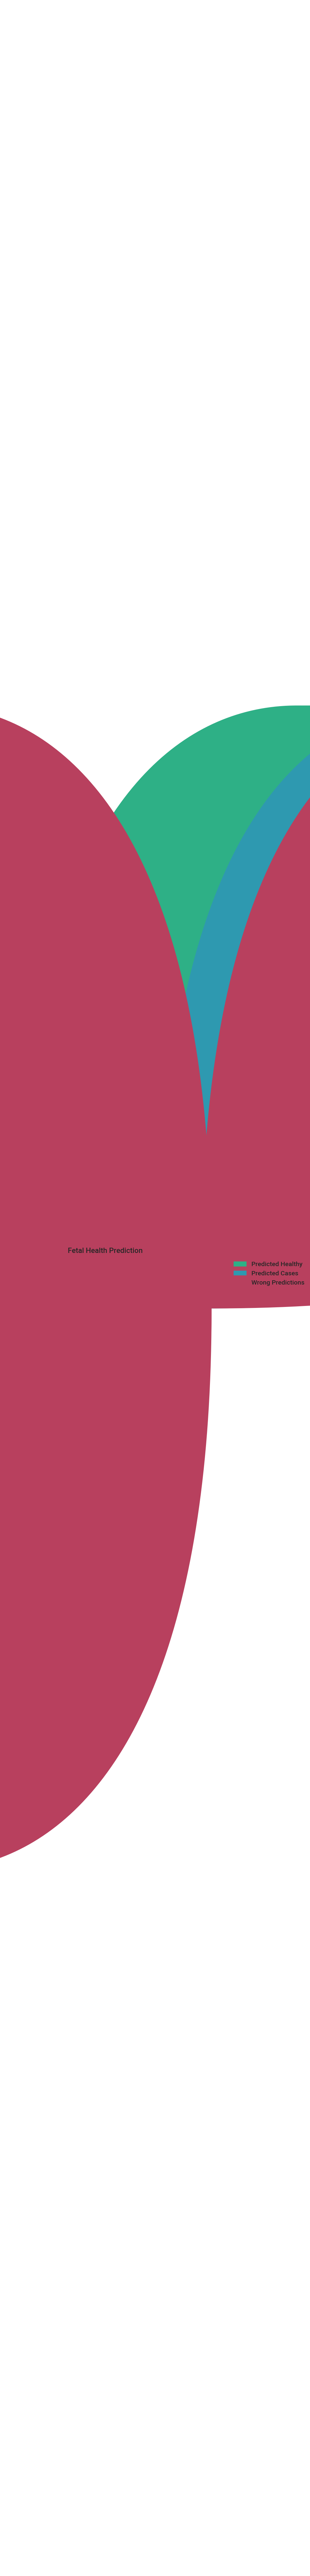

In [73]:
# Plotting results
fig = plt.figure(FigureClass=Waffle,
                 figsize=(12,4),
                 rows=5,
                 columns=20,
                 title={'label': 'Fetal Health Prediction', 
                        'loc': 'center', 
                        'fontdict': {'fontsize': 16, 'fontweight': 'bold'}},
                 colors=('#2EB086', '#2E99B0', '#B8405E'),
                 icons='child',
                 #icon_size=1,
                 values={'Predicted Healthy': 73.31,
                         'Predicted Cases': 21.05,
                         'Wrong Predictions': 5.26+0.38},
                 legend={'loc': 'upper left',
                         'bbox_to_anchor': (1.1, 1),
                         'fontsize': 14},
                )

fig.set_tight_layout(False)
plt.show()

When applying our model we were able to correctly classify of 94.36% the screenings! 

## References

1: https://www.nhs.uk/pregnancy/finding-out/due-date-calculator/

2: https://medlineplus.gov/fetalhealthanddevelopment.html

3: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6510058/

4: https://en.wikipedia.org/wiki/Feature_selection

5: https://pycaret.gitbook.io/docs/get-started/preprocessing/feature-selection
